In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing


def f1(x, t):
    return 1.0 / np.cosh(x + 3) * np.cos(2.3 * t)

def f2(x, t):
    return 2.0 / np.cosh(x) * np.tanh(x) * np.sin(2.8 * t)

nx = 65  # number of grid points along space dimension
nt = 129  # number of grid points along time dimension

# Define the space and time grid for data collection.
x = np.linspace(-5, 5, nx)
t = np.linspace(0, 4 * np.pi, nt)
xgrid, tgrid = np.meshgrid(x, t)
dt = t[1] - t[0]  # time step between each snapshot

# Data consists of 2 spatiotemporal signals.
X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

# Make a version of the data with noise.
mean = 0
std_dev = 0.2
random_matrix = np.random.normal(mean, std_dev, size=(nt, nx))
Xn = X + random_matrix

X.shape


(129, 65)

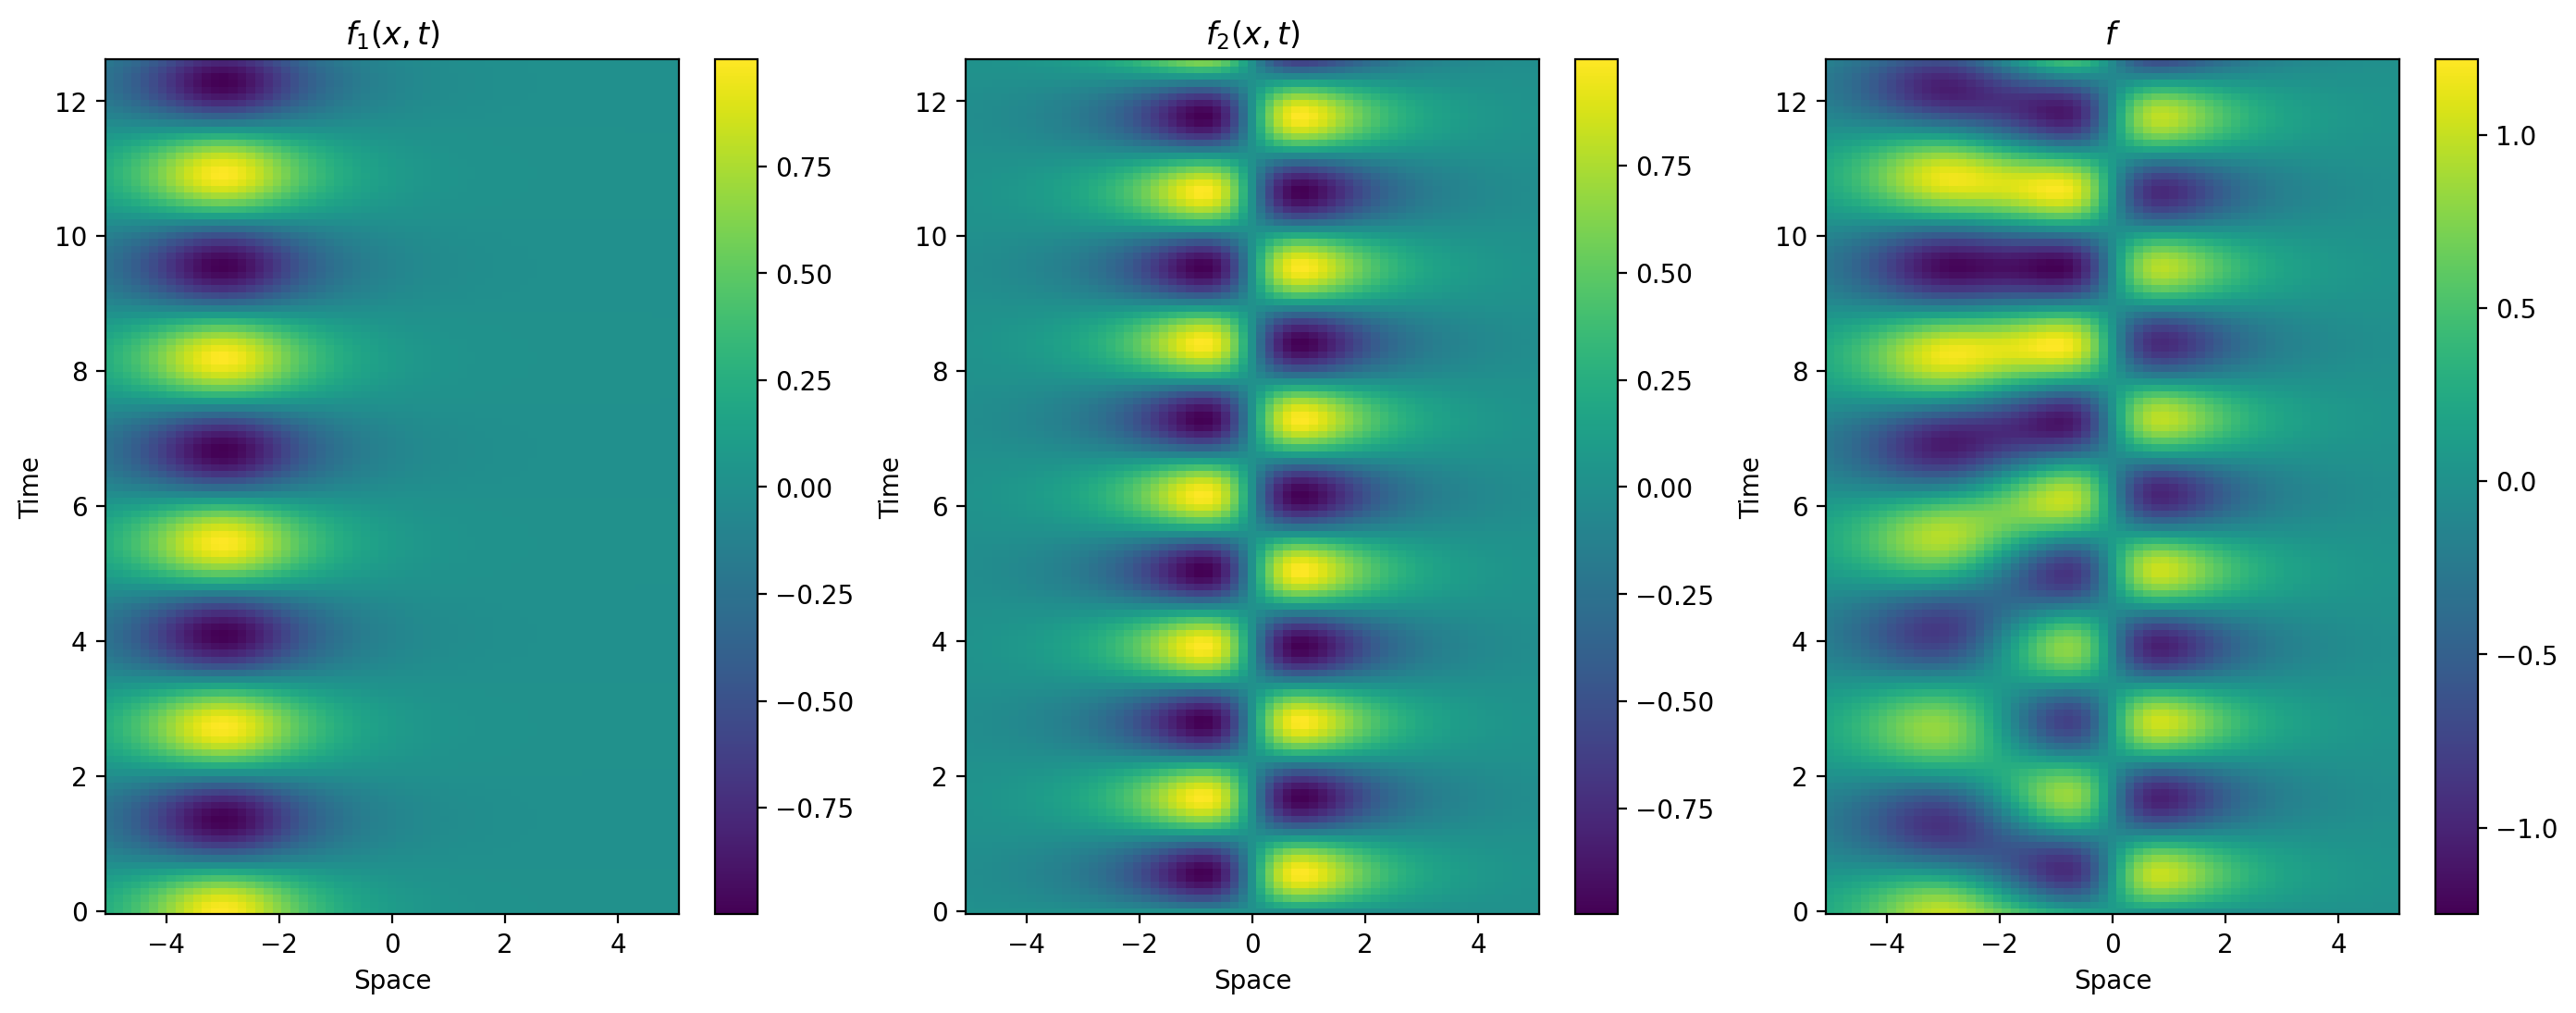

In [2]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f$"]
data = [X1, X2, X]

fig = plt.figure(figsize=(17, 6), dpi=200)
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
    plt.xlabel("Space")
    plt.ylabel("Time")
    plt.colorbar()
plt.show()

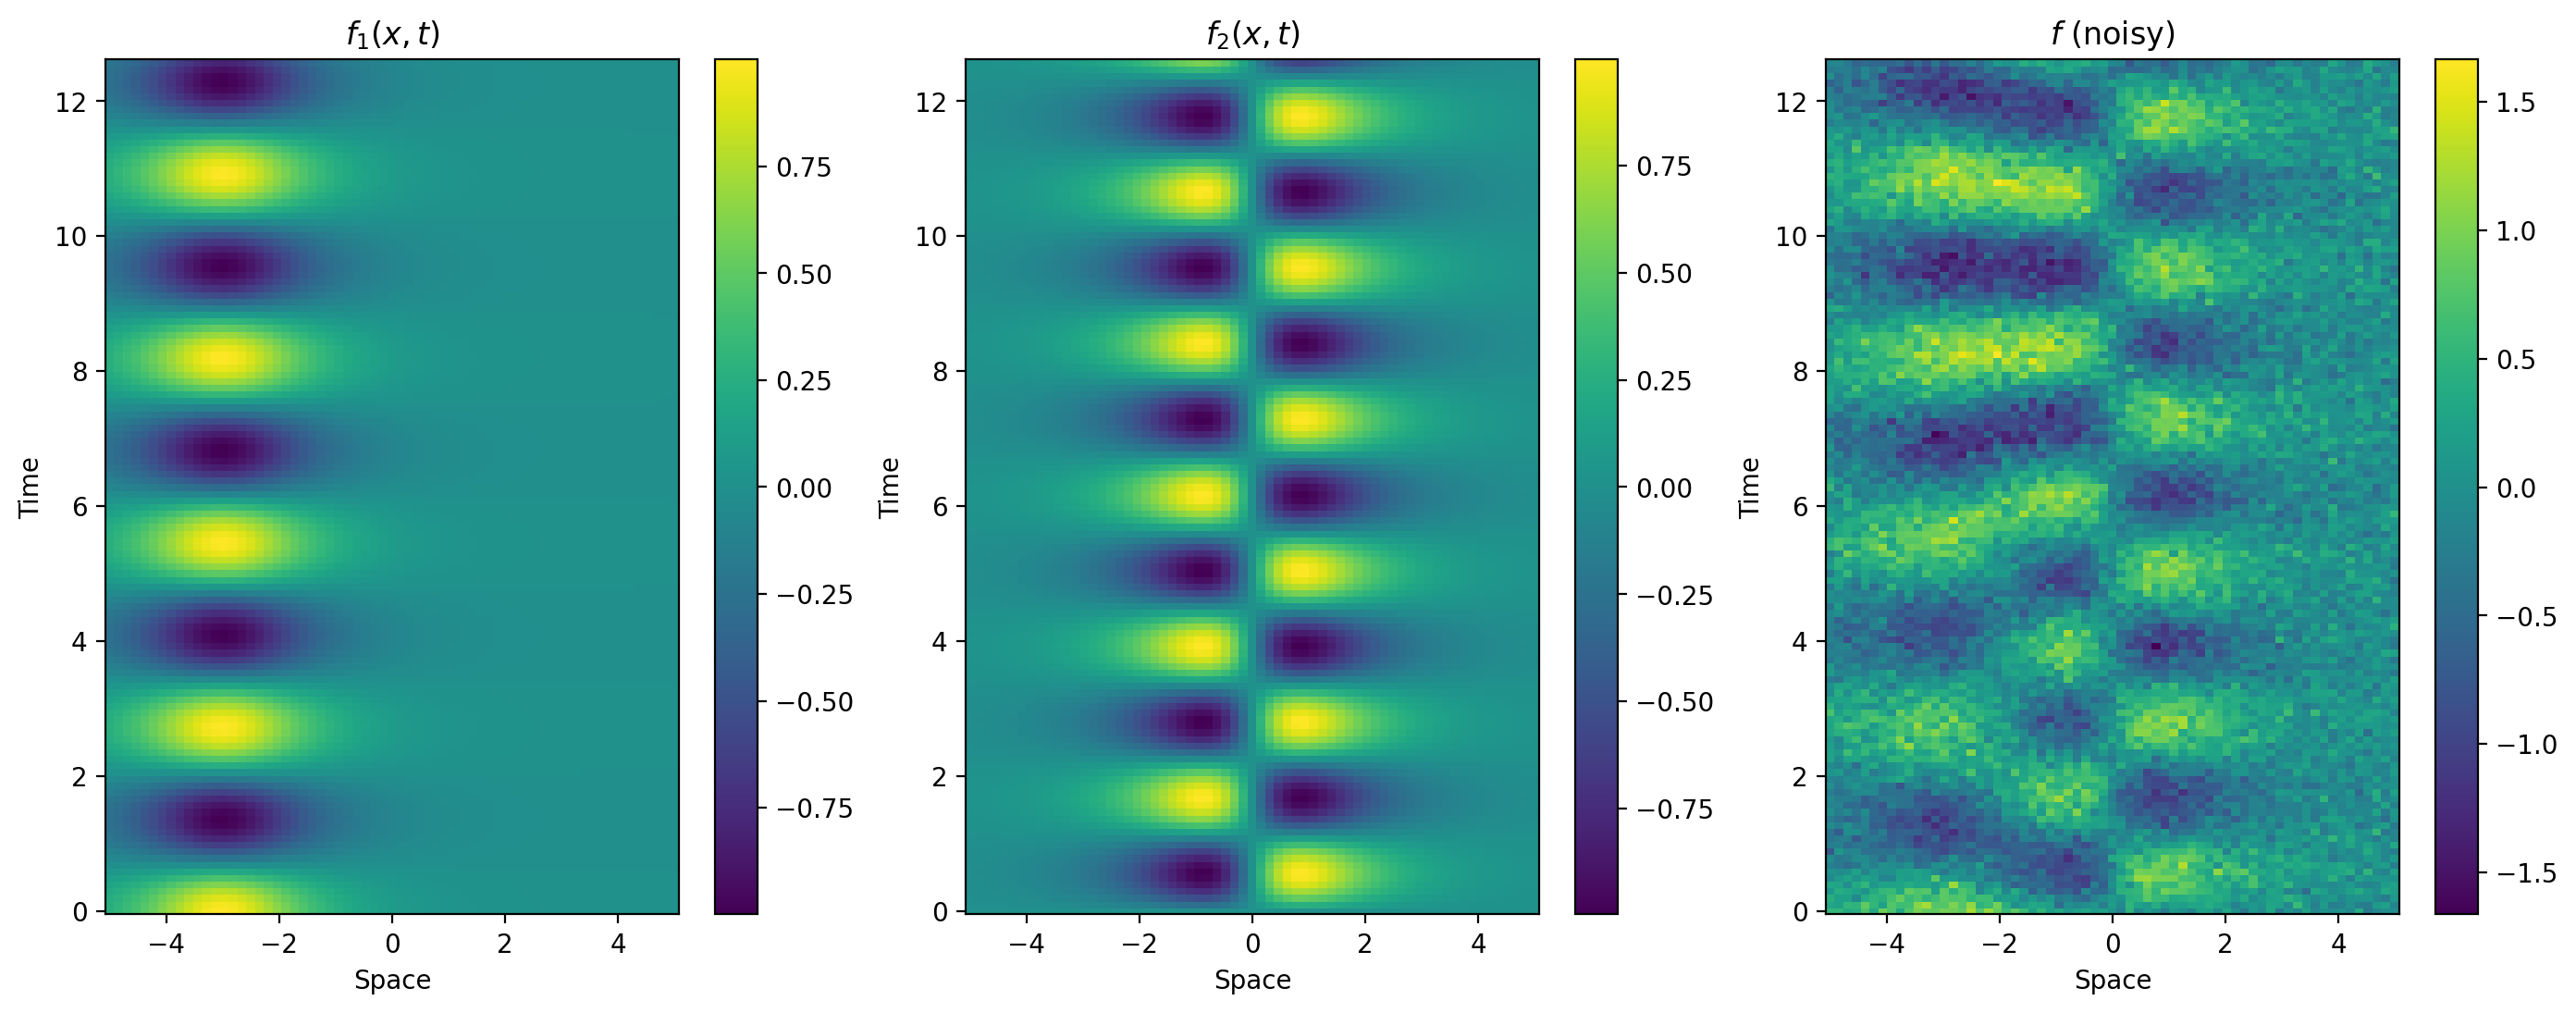

In [3]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f$ (noisy)"]
data = [X1, X2, Xn]

fig = plt.figure(figsize=(17, 6), dpi=200)
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
    plt.xlabel("Space")
    plt.ylabel("Time")
    plt.colorbar()
plt.show()

In [4]:
print(Xn.shape)
print(t.shape)


(129, 65)
(129,)


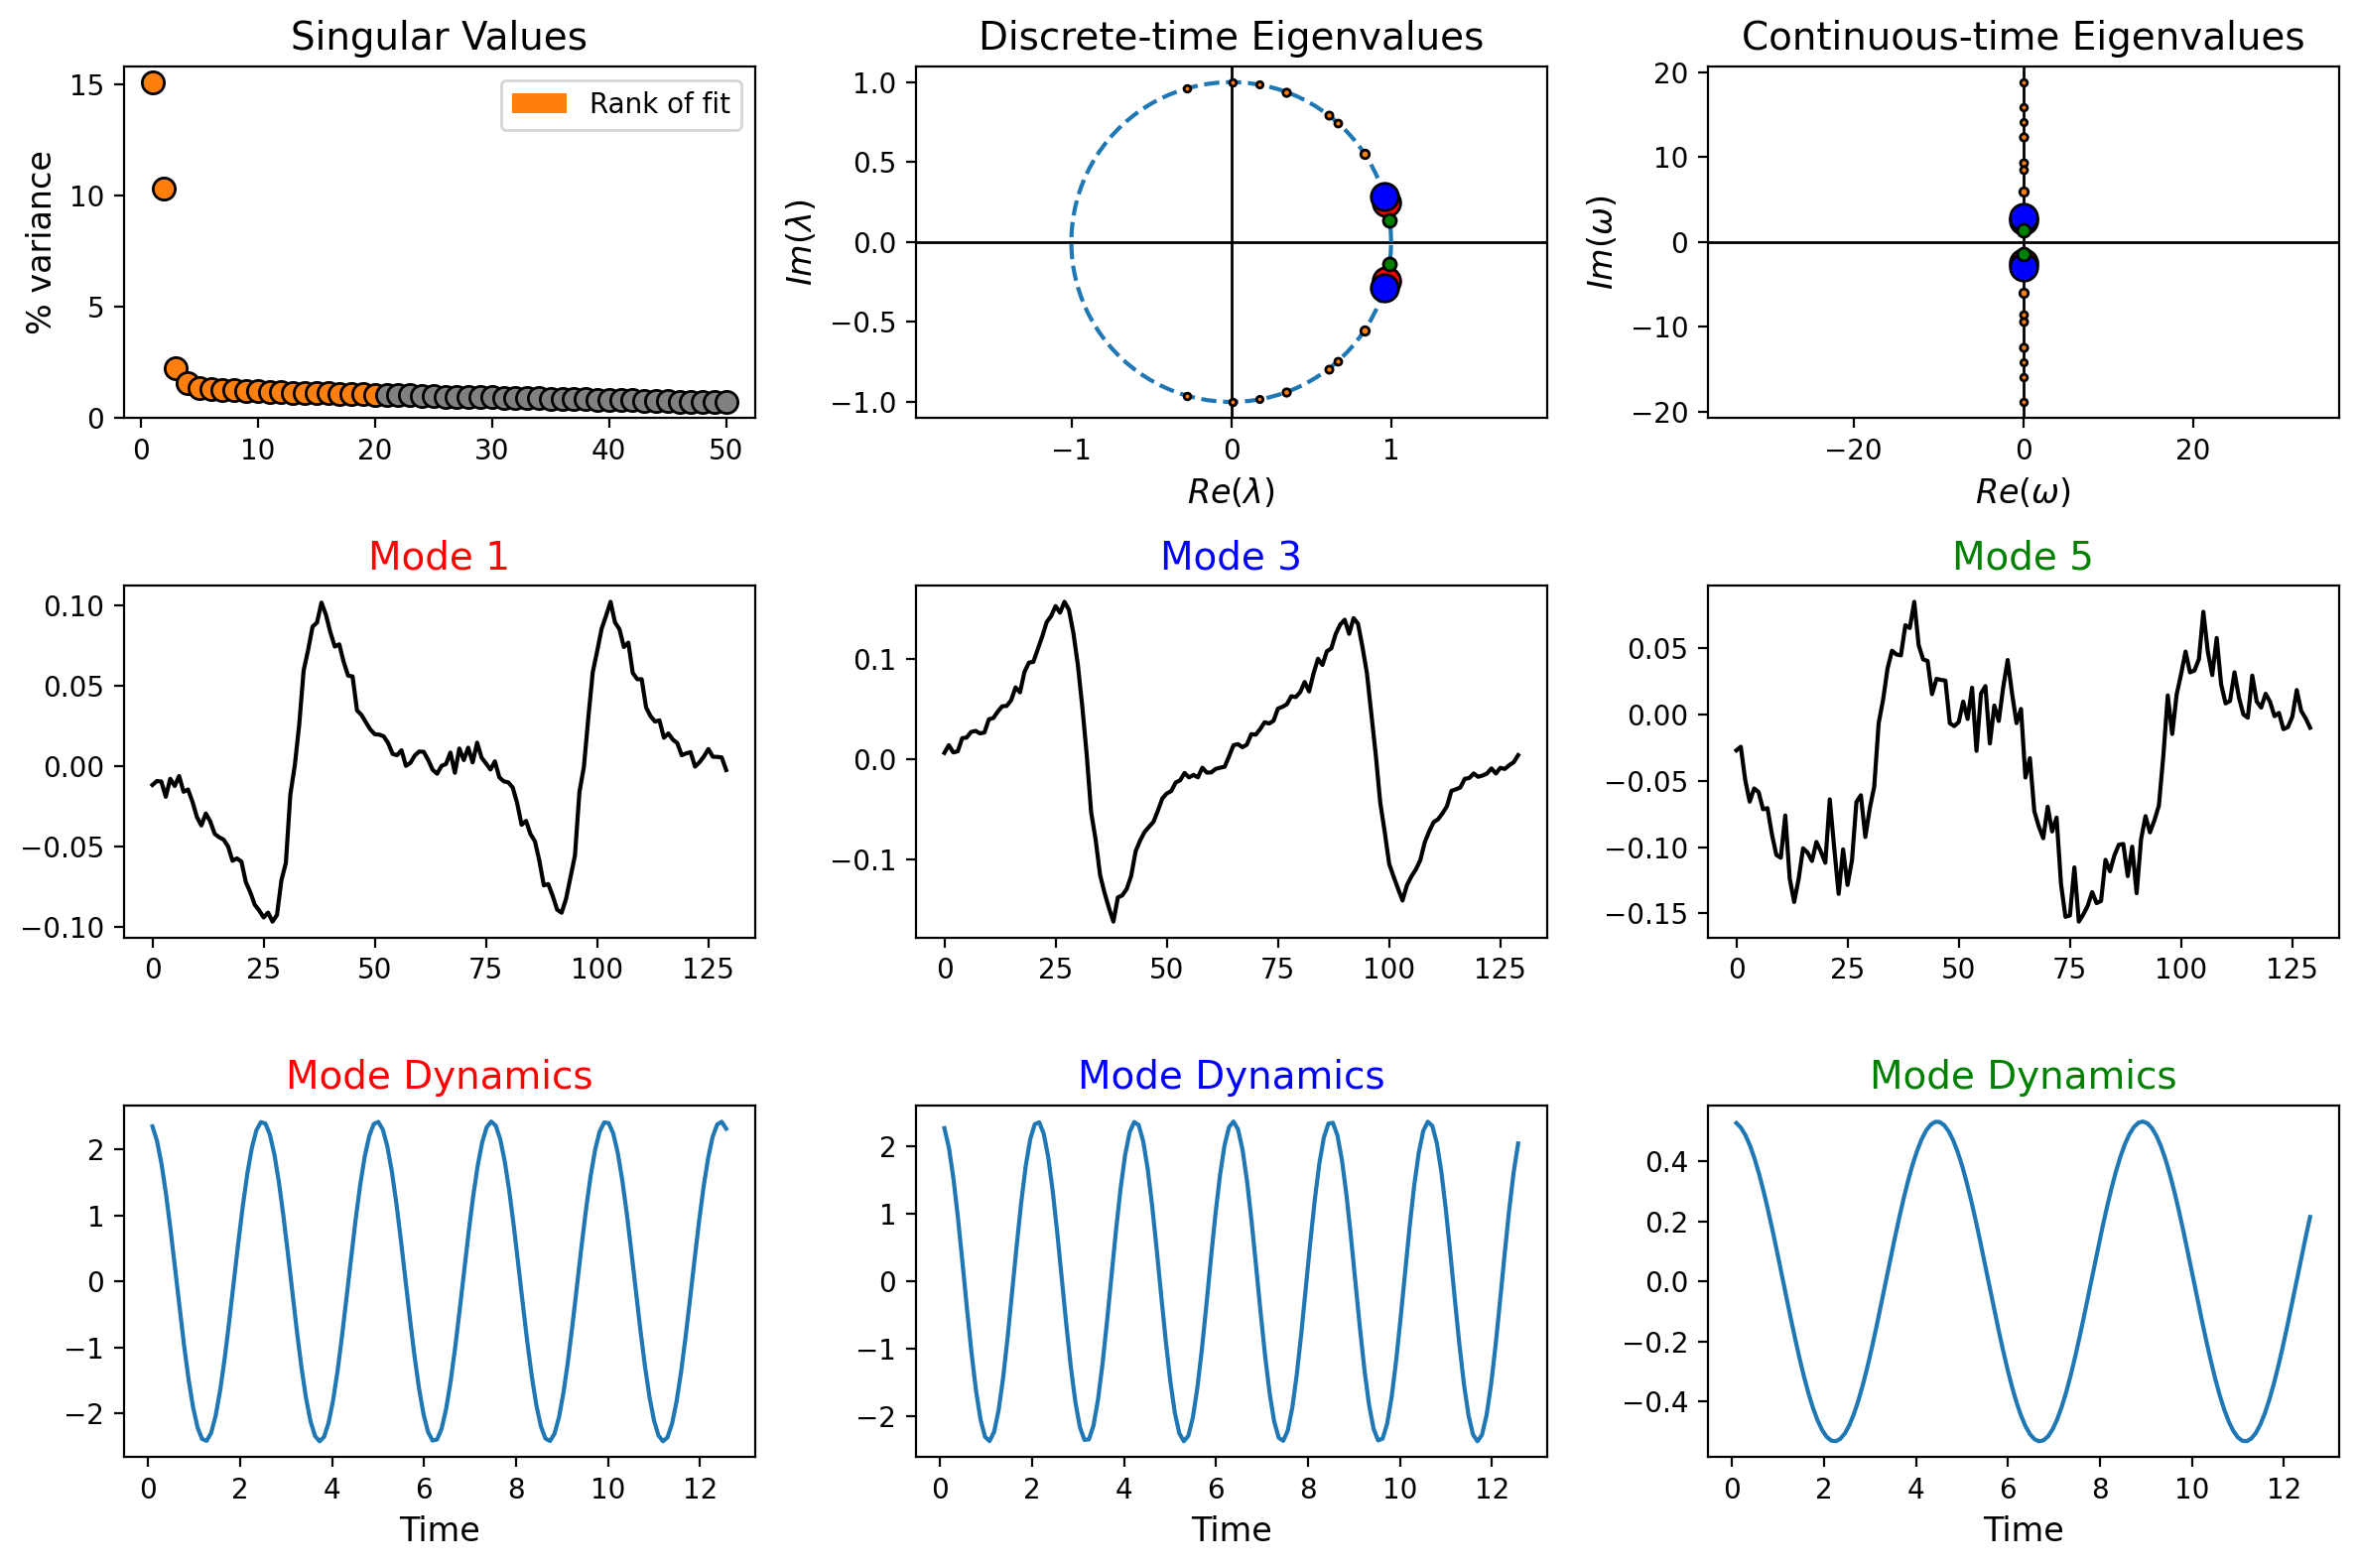

<Figure size 640x480 with 0 Axes>

In [15]:


U = Xn.T 
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=20, num_trials=0, eig_constraints={"imag", "conjugate_pairs"}), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_optdmd.fit(U, t=t[1:])
plot_summary(delay_optdmd, index_modes=[0,2,4], order='F') # pick correct modes


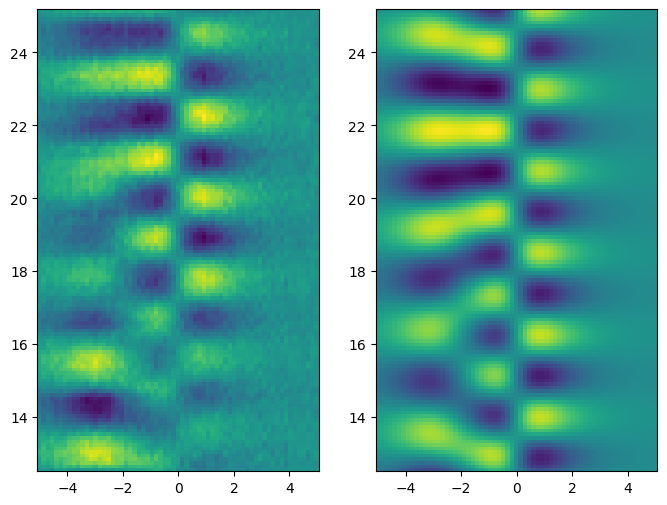

In [6]:
fig, ax = plt.subplots(1,2,figsize=(8, 6))
ax = ax.flatten()

# Produce forecast
time_forecast = np.linspace(4 * np.pi, 8 * np.pi, nt)
forecast_mean = delay_optdmd.forecast(time_forecast)
Fore = forecast_mean[:nx,:].T

xgrid_fore, tgrid_fore = np.meshgrid(x, time_forecast)
ax[0].pcolor(xgrid_fore, tgrid_fore, Fore.real)

# Data consists of 2 spatiotemporal signals.
X1f = f1(xgrid_fore, tgrid_fore)
X2f = f2(xgrid_fore, tgrid_fore)
Xf = X1f + X2f

ax[1].pcolor(xgrid_fore, tgrid_fore, Xf)
plt.show()


In [7]:
# Order the results by bn value
bn = delay_optdmd.amplitudes
print(f"Original bn:{bn}")

# Create the index of order
order = np.argsort(bn)[::-1]
print(f"Size order of bn {order}")

# Reorder bn
bn = bn[order]
print(f"New bn order: {bn}")

# Reorder Psi
all_Psi = delay_optdmd.modes
Psi = all_Psi[:24,:] # Only take the first 24 state space (with delay embed of 1)
Psi = Psi[:,order]

# Reorder Lambda
Lambda = delay_optdmd.eigs 
Lambda = Lambda[order]
print(Lambda)


Original bn:[0.14029016 0.14029016 0.14072915 0.14072915 0.12684835 0.12684835
 0.17397873 0.17397873 0.16374212 0.16374212 0.15307897 0.15307897
 0.2288384  0.2288384  0.53271227 0.53271227 2.42084104 2.42084104
 2.37248624 2.37248624]
Size order of bn [16 17 18 19 15 14 12 13  7  6  8  9 10 11  3  2  0  1  4  5]
New bn order: [2.42084104 2.42084104 2.37248624 2.37248624 0.53271227 0.53271227
 0.2288384  0.2288384  0.17397873 0.17397873 0.16374212 0.16374212
 0.15307897 0.15307897 0.14072915 0.14072915 0.14029016 0.14029016
 0.12684835 0.12684835]
[ 0. +2.52399732j -0. -2.52399732j  0. +2.95773078j -0. -2.95773078j
 -0. -1.40804438j  0. +1.40804438j  0. +5.97435426j -0. -5.97435426j
 -0.-12.43012203j  0.+12.43012203j  0. +9.33527981j -0. -9.33527981j
  0. +8.57416994j -0. -8.57416994j -0.-15.92371322j  0.+15.92371322j
  0.+18.84398898j -0.-18.84398898j  0.+14.18133809j -0.-14.18133809j]


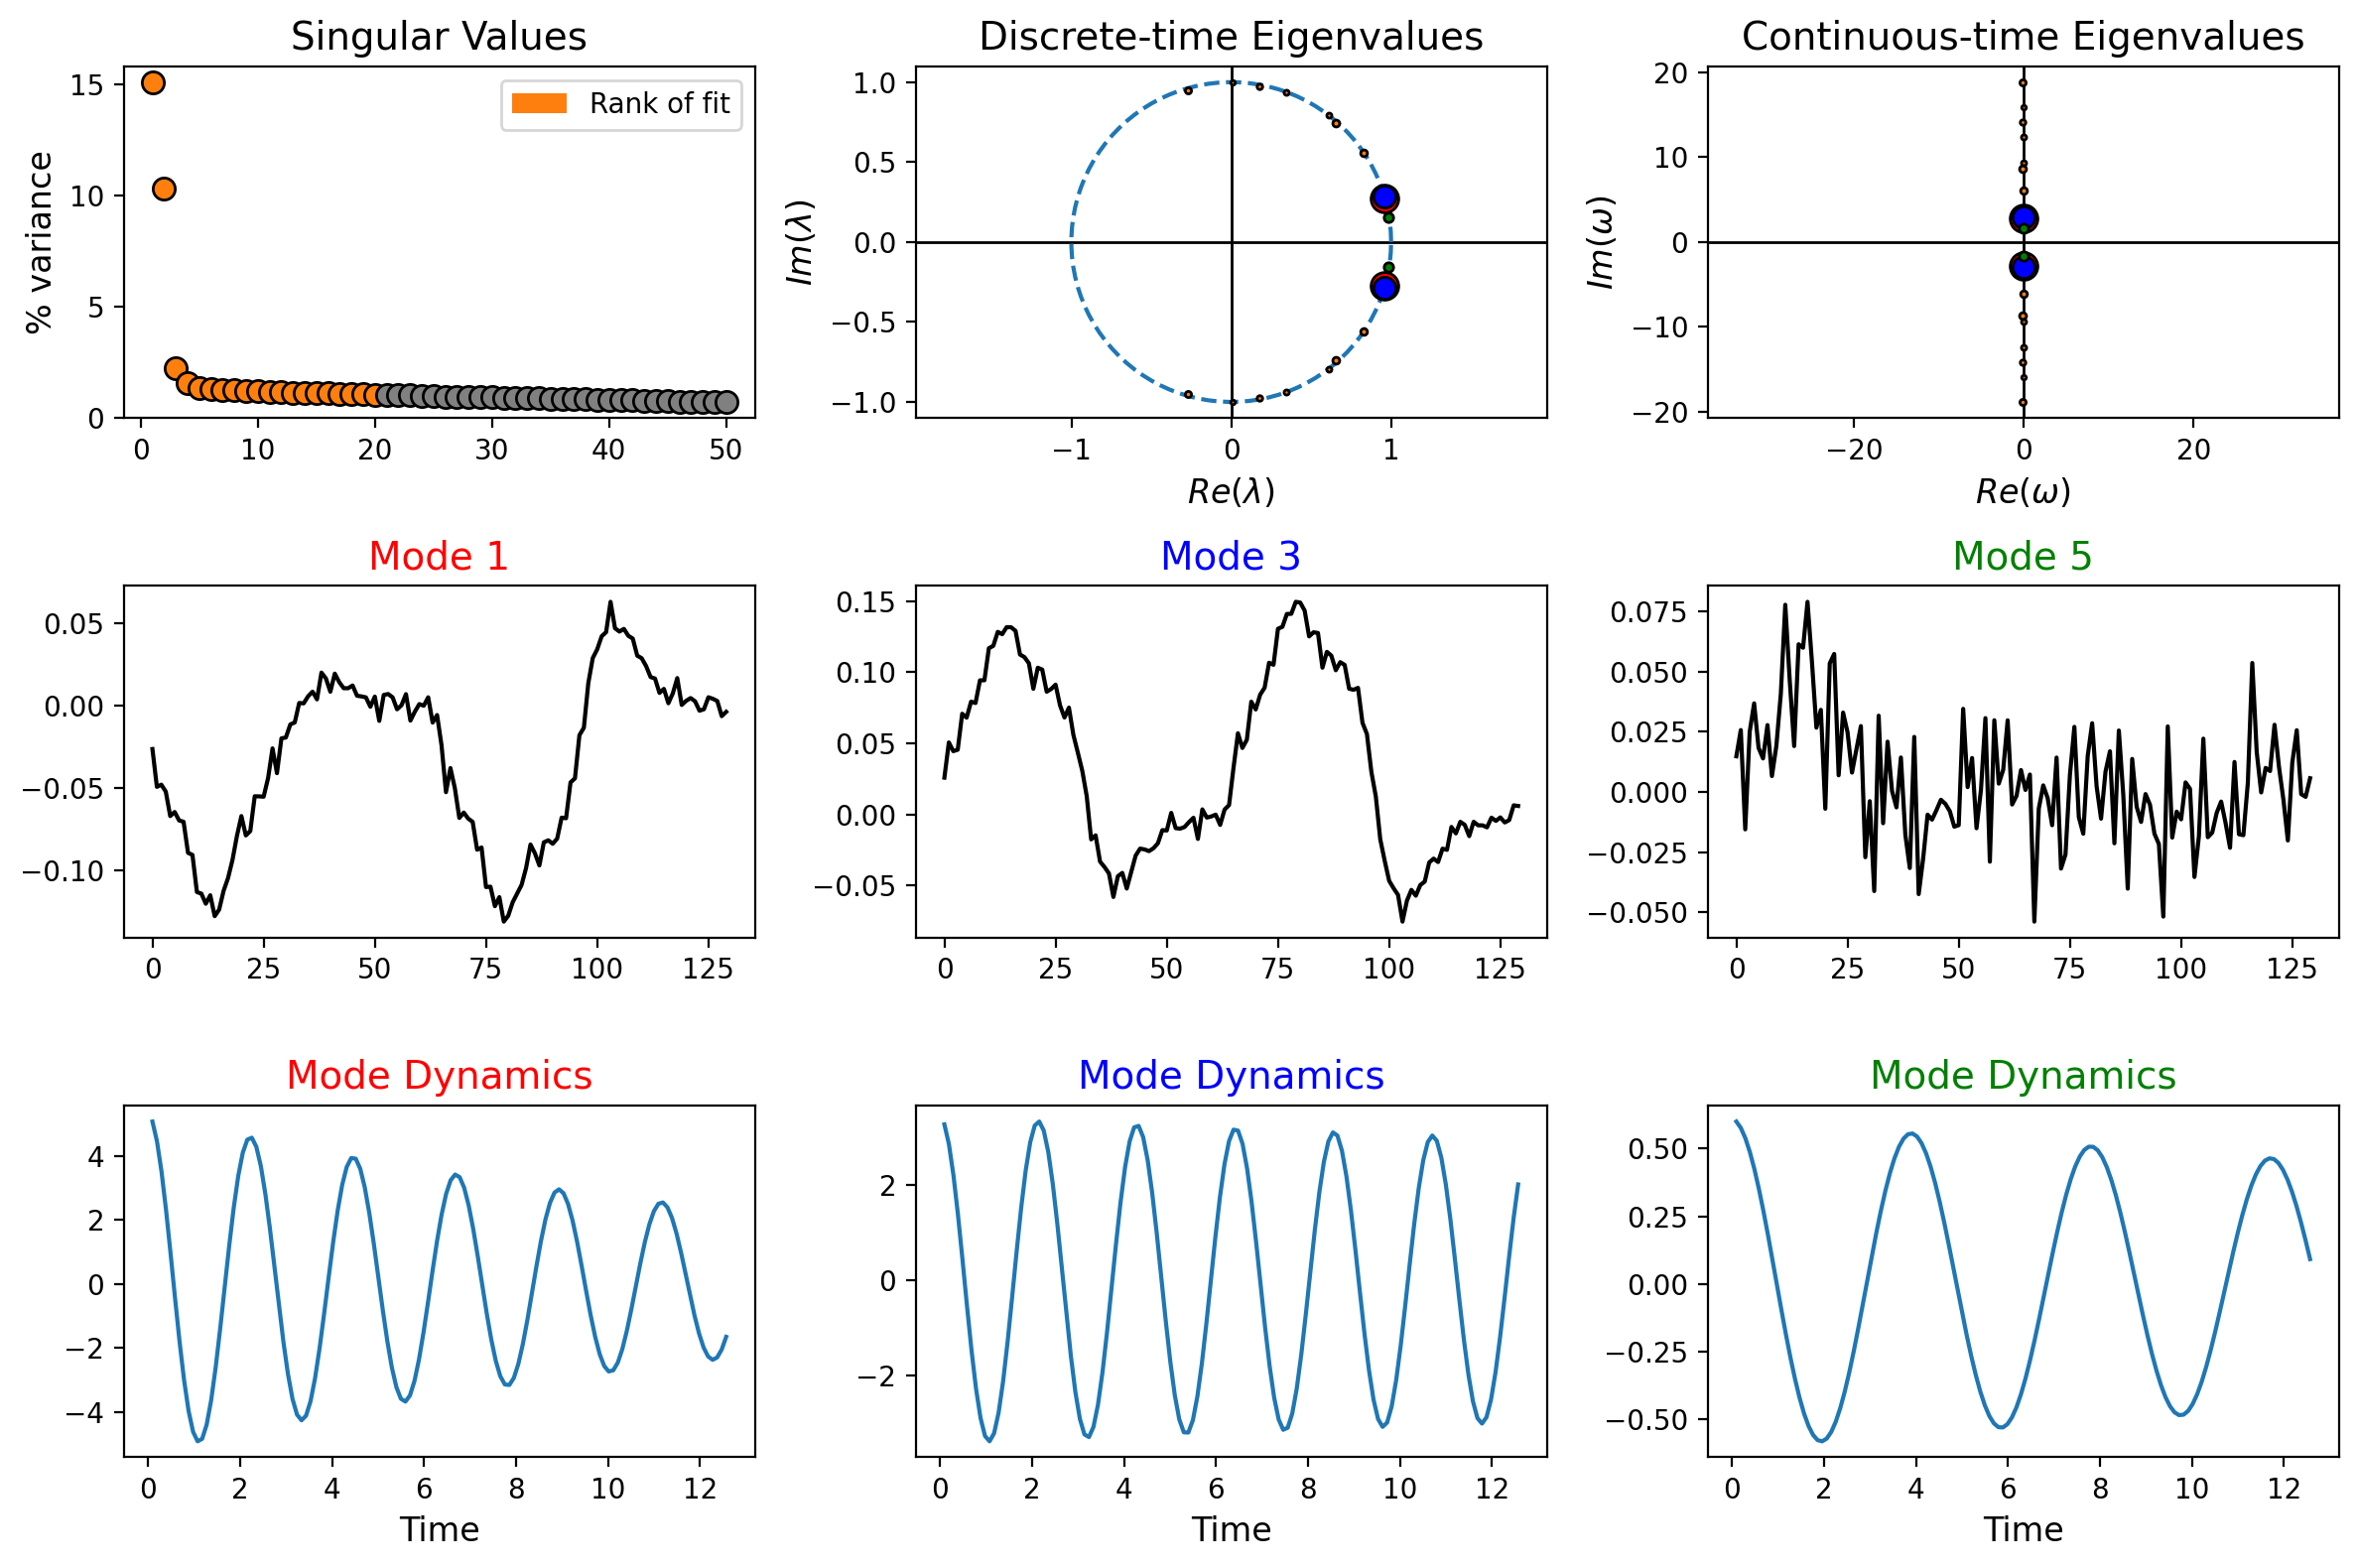

In [8]:
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=20, num_trials=0, eig_constraints={"stable", "conjugate_pairs"}), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_optdmd.fit(U, t=t[1:])
plot_summary(delay_optdmd, index_modes=[0,2,4], order='F') # pick correct modes


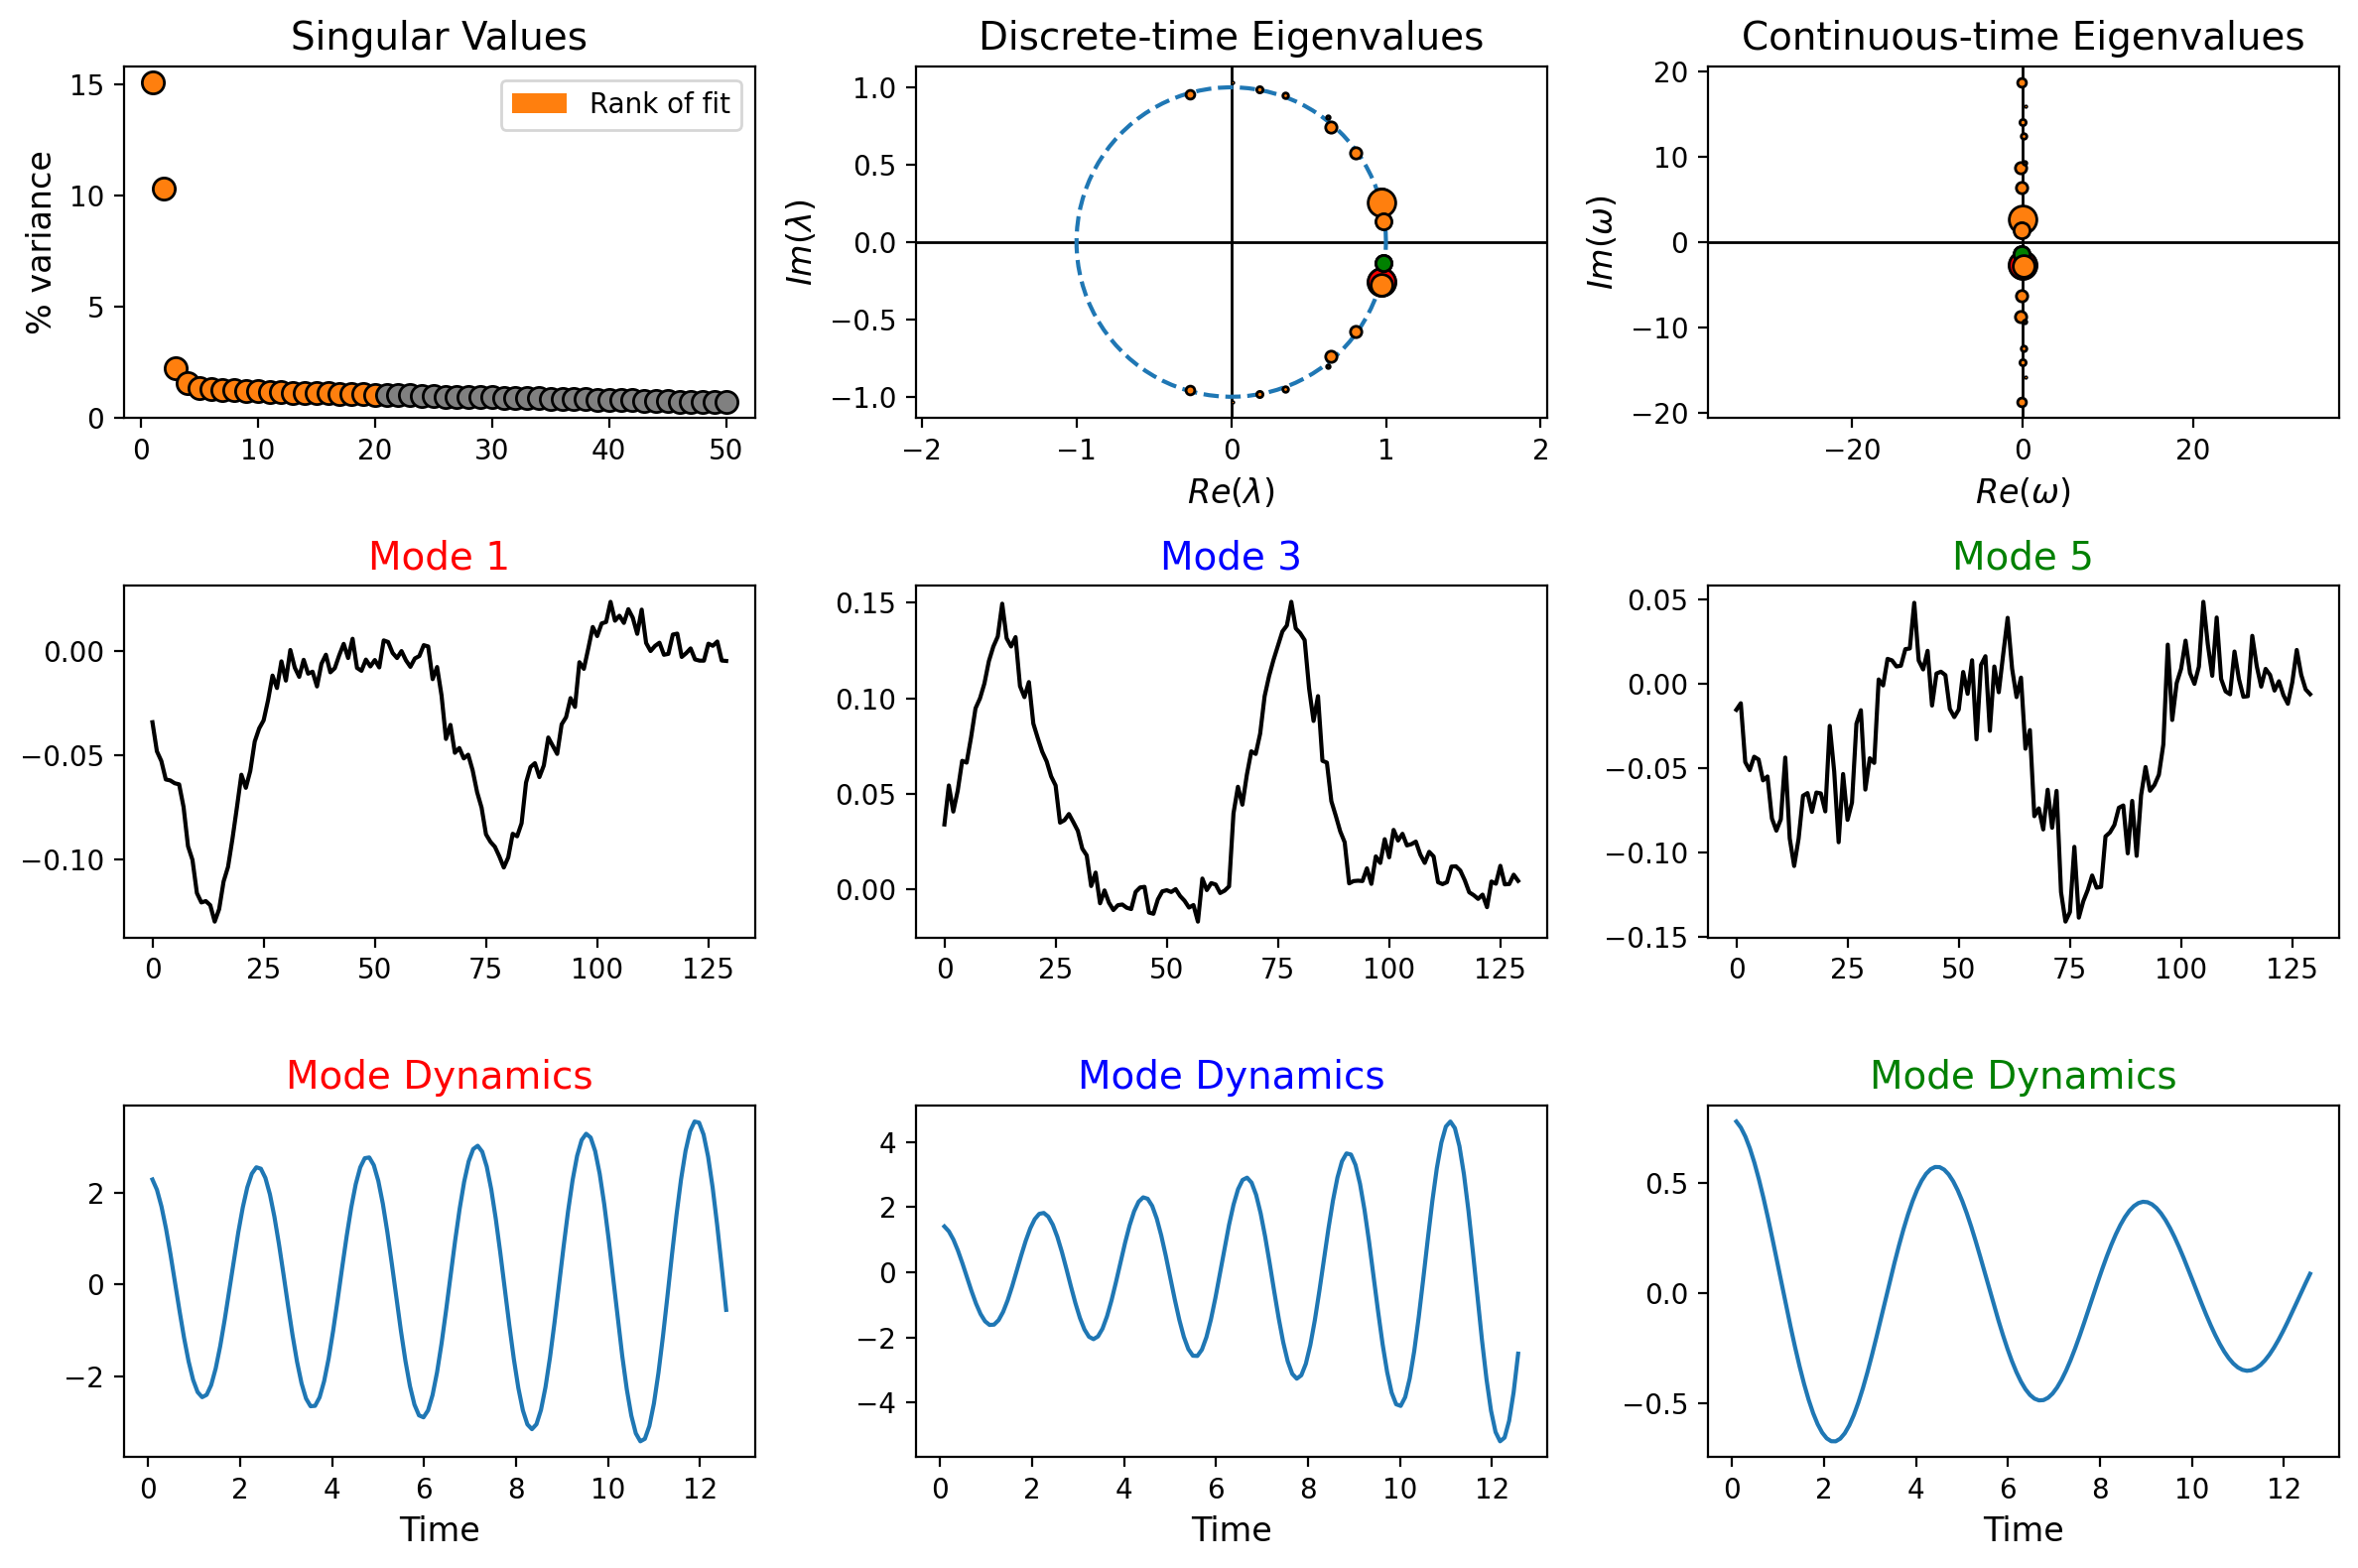

In [9]:
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=20, num_trials=0), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_optdmd.fit(U, t=t[1:])
plot_summary(delay_optdmd, index_modes=[0,2,4], order='F') # pick correct modes


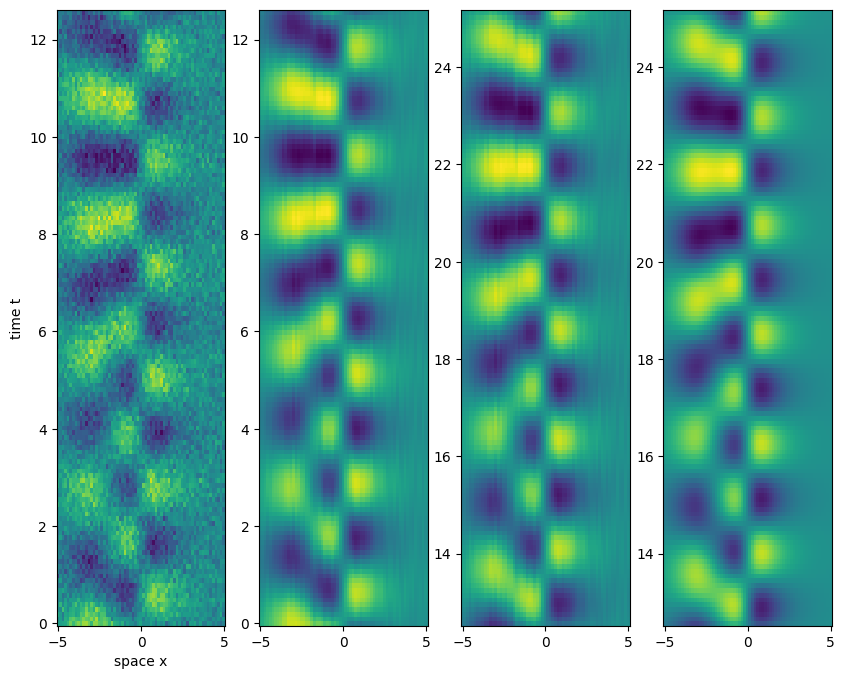

In [41]:
fig, ax = plt.subplots(1,4,figsize=(10, 8))
ax = ax.flatten()

# Define the space and time grid for data collection.
x = np.linspace(-5, 5, nx)
t = np.linspace(0, 4 * np.pi, nt)
xgrid, tgrid = np.meshgrid(x, t)
dt = t[1] - t[0]  # time step between each snapshot

# Data consists of 2 spatiotemporal signals.
X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

# Make a version of the data with noise.
mean = 0
std_dev = 0.2
random_matrix = np.random.normal(mean, std_dev, size=(nt, nx))
Xn = X + random_matrix

ax[0].pcolor(xgrid, tgrid, Xn)

U = Xn.T 
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=4, num_trials=0, eig_constraints={"imag", "conjugate_pairs"}), d=2)
delay_optdmd.fit(U, t=t[1:])

reconstruct_mean = delay_optdmd.forecast(t)
Recon = reconstruct_mean[:nx,:].T
ax[1].pcolor(xgrid,tgrid,Recon.real)



time_forecast = np.linspace(4 * np.pi, 8 * np.pi, nt)
forecast_mean = delay_optdmd.forecast(time_forecast)
Fore = forecast_mean[:nx,:].T

xgrid_fore, tgrid_fore = np.meshgrid(x, time_forecast)
ax[2].pcolor(xgrid_fore, tgrid_fore, Fore.real)

# Data consists of 2 spatiotemporal signals.
X1f = f1(xgrid_fore, tgrid_fore)
X2f = f2(xgrid_fore, tgrid_fore)
Xf = X1f + X2f

ax[3].pcolor(xgrid_fore, tgrid_fore, Xf)

ax[0].set_xlabel('space x')
ax[0].set_ylabel('time t')


plt.savefig('DMDexample.eps', format='eps')
plt.show()

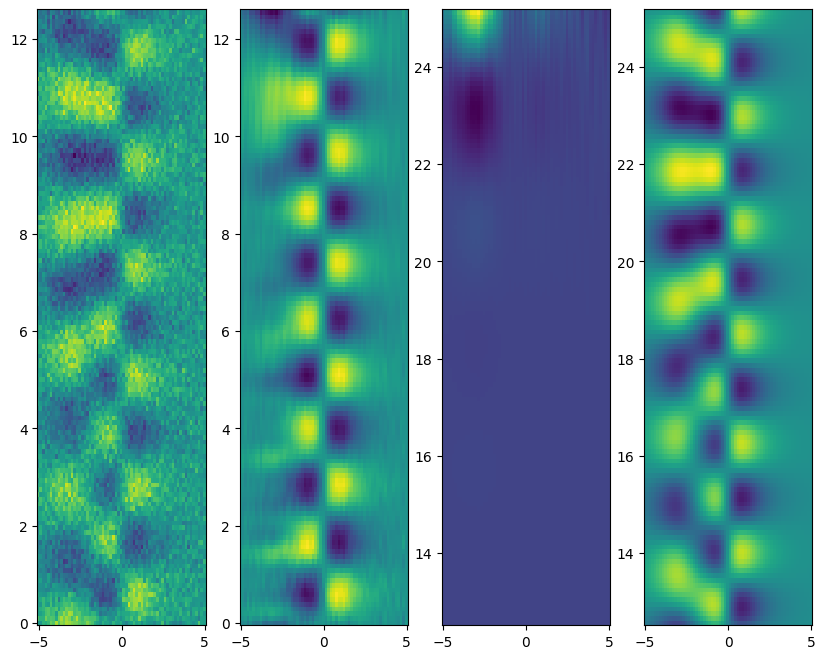

In [36]:
fig, ax = plt.subplots(1,4,figsize=(10, 8))
ax = ax.flatten()

ax[0].pcolor(xgrid, tgrid, Xn)

U = Xn.T 
#delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=10, num_trials=0, eig_constraints={"imag", "conjugate_pairs"}), d=2)
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=10, num_trials=0), d=2)
#delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=10, num_trials=0, eig_constraints={"stable", "conjugate_pairs"}), d=2)
delay_optdmd.fit(U, t=t[1:])

reconstruct_mean = delay_optdmd.forecast(t)
Recon = reconstruct_mean[:nx,:].T
ax[1].pcolor(xgrid,tgrid,Recon.real)


time_forecast = np.linspace(4 * np.pi, 8 * np.pi, nt)
forecast_mean = delay_optdmd.forecast(time_forecast)
Fore = forecast_mean[:nx,:].T

xgrid_fore, tgrid_fore = np.meshgrid(x, time_forecast)
ax[2].pcolor(xgrid_fore, tgrid_fore, Fore.real)

# Data consists of 2 spatiotemporal signals.
X1f = f1(xgrid_fore, tgrid_fore)
X2f = f2(xgrid_fore, tgrid_fore)
Xf = X1f + X2f

ax[3].pcolor(xgrid_fore, tgrid_fore, Xf)

plt.show()